In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
df= pd.read_csv('housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


look for null values

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


fix null values

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

/tmp/ipython-input-1492620623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


<Axes: >

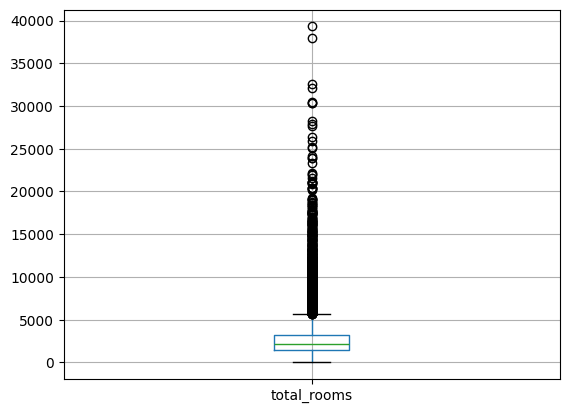

In [ ]:
df.boxplot(column=['total_rooms'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'population_per_household'}>]],
      dtype=object)

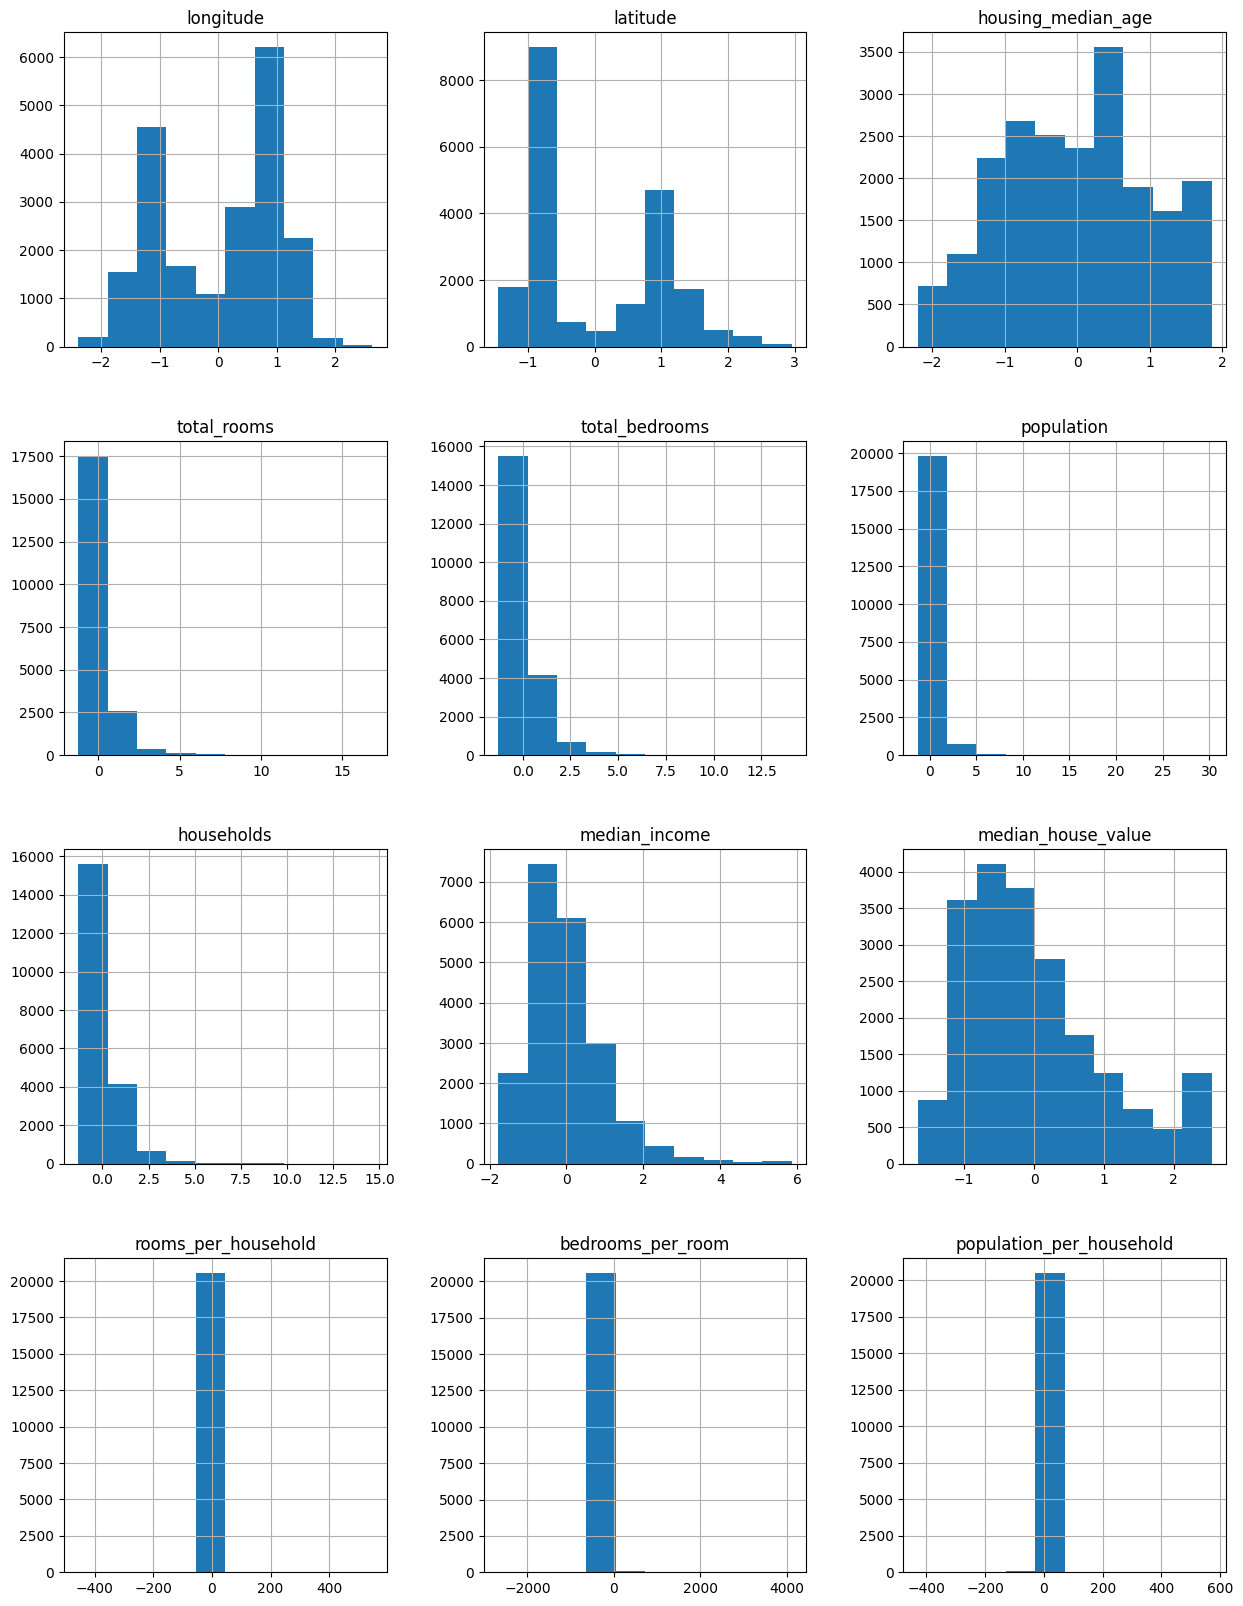

In [ ]:
df.hist(figsize=(15,20))


**now feature engineering**

use hot dog encoding to convert object type

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["ocean_proximity"]=le.fit_transform(df["ocean_proximity"])

In [ ]:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

<Axes: xlabel='longitude', ylabel='latitude'>

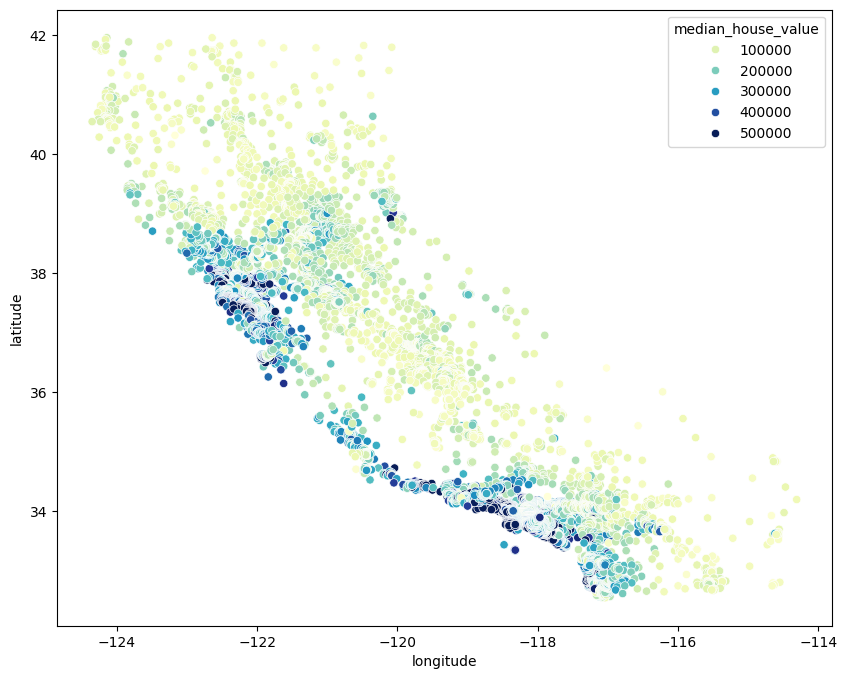

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="longitude",y="latitude",data=df,hue="median_house_value",palette="YlGnBu")

feature selection (drop weakly corelated columns)
Features highly correlated with the target variable (these are usually good features to keep).
Features weakly correlated with the target variable (these might be considered for removal).
Features highly correlated with each other (consider removing one of a pair).

Correlation Matrix:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
longitude,1.000000,-0.924664,-0.108197,0.029337,0.060639,0.109029,0.055261,-0.015176,-0.045967,-0.289779,-0.067424,0.094885
latitude,-0.924664,1.000000,0.011173,-0.032319,-0.068087,-0.136460,-0.087937,-0.079809,-0.144160,0.200974,0.140647,-0.109774
housing_median_age,-0.108197,0.011173,1.000000,-0.315216,-0.270574,-0.244264,-0.242896,-0.119034,0.105623,0.112468,-0.036173,-0.023437
total_rooms,0.029337,-0.032319,-0.315216,1.000000,0.940884,0.864776,0.931710,0.205928,0.159422,-0.012945,-0.370400,0.375842
total_bedrooms,0.060639,-0.068087,-0.270574,0.940884,1.000000,0.892830,0.969412,-0.025509,0.053010,-0.010434,-0.542872,0.658063
population,0.109029,-0.136460,-0.244264,0.864776,0.892830,1.000000,0.932306,-0.005046,-0.021205,-0.077639,-0.617437,0.535640
households,0.055261,-0.087937,-0.242896,0.931710,0.969412,0.932306,1.000000,0.003716,0.073612,-0.014324,-0.649827,0.593592
median_income,-0.015176,-0.079809,-0.119034,0.205928,-0.025509,-0.005046,0.003716,1.000000,0.688075,-0.014957,0.334360,-0.497009
median_house_value,-0.045967,-0.144160,0.105623,0.159422,0.053010,-0.021205,0.073612,0.688075,1.000000,0.081750,0.113995,-0.196809
ocean_proximity,-0.289779,0.200974,0.112468,-0.012945,-0.010434,-0.077639,-0.014324,-0.014957,0.081750,1.000000,0.008913,-0.003262


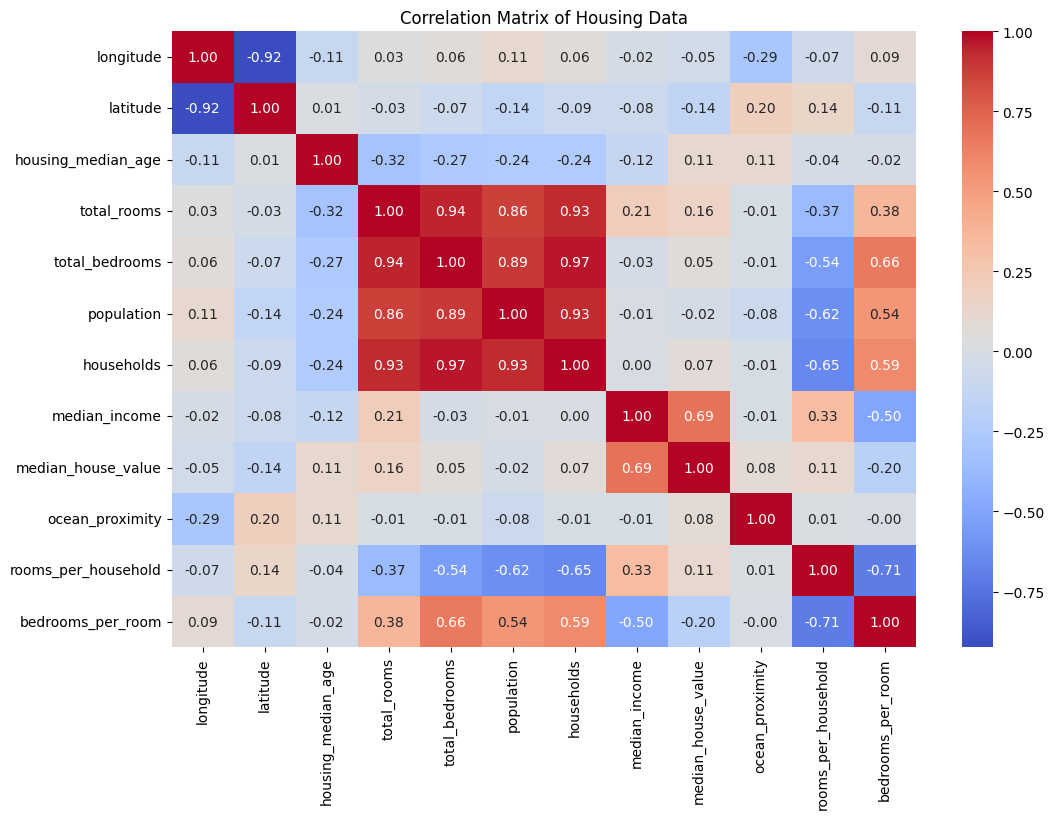

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Data')
plt.show()

In [ ]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df['population_per_household'] = df['population'] / df['households']

drop original columns

In [ ]:
df=df.drop(['total_rooms','total_bedrooms','population'],axis=1)

Features with higher absolute values (closer to 1 or -1) have a stronger linear relationship with the median house value and are likely more important for prediction. median_income has the highest positive correlation (0.69), while ocean_proximity_INLAND has the strongest negative correlation (-0.48).
Features with lower absolute values (closer to 0) have a weaker linear relationship and might be less useful. For example, total_bedrooms, population, households, ocean_proximity_ISLAND, and total_rooms have relatively low correlations with median_house_value.

now split data for models


In [ ]:
# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


split traning and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (14448, 9)
Testing features shape: (6192, 9)
Training target shape: (14448,)
Testing target shape: (6192,)


model selection and traning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = linear_reg.predict(X_test)

from sklearn.preprocessing import StandardScaler

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Performance:
Mean Squared Error (MSE): 4848211179.90
Root Mean Squared Error (RMSE): 69629.10
R-squared (R2): 0.64


ridge regression model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

ridge= Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# print("Ridge Regression Performance (after GridSearchCV):")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")

Mean Squared Error (MSE): 4848687273.88
Root Mean Squared Error (RMSE): 69632.52
R-squared (R2): 0.64


lasso regression with cross validation

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso= r2_score(y_test, y_pred_lasso)

print("\nLasso Regression (with best alpha from CV) Performance (after GridSearchCV):")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")


Lasso Regression (with best alpha from CV) Performance (after GridSearchCV):
Mean Squared Error (MSE): 4848238603.16
Root Mean Squared Error (RMSE): 69629.29
R-squared (R2): 0.64


elastic net model

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

elastic_net_cv = ElasticNetCV(cv=3, random_state=42, l1_ratio=[1.0]) # Example l1_ratio values to test

# Train the model on the training data
elastic_net_cv.fit(X_train, y_train)

# Get the best alpha and l1_ratio found
best_alpha_en = elastic_net_cv.alpha_
best_l1_ratio_en = elastic_net_cv.l1_ratio_
print(f"Best alpha found by ElasticNetCV: {best_alpha_en:.1f}")
print(f"Best l1_ratio found by ElasticNetCV: {best_l1_ratio_en:.1f}")


# Make predictions on the testing set using the model with the best parameters
y_pred_en_cv = elastic_net_cv.predict(X_test)

# Evaluate the model
mse_en_cv = mean_squared_error(y_test, y_pred_en_cv)
rmse_en_cv = np.sqrt(mse_en_cv)
r2_en_cv = r2_score(y_test, y_pred_en_cv)

print("\nElasticNet Regression (with best parameters from CV) Performance:")
print(f"Mean Squared Error (MSE): {mse_en_cv:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en_cv:.2f}")
print(f"R-squared (R2): {r2_en_cv:.2f}")

Best alpha found by ElasticNetCV: 155.1
Best l1_ratio found by ElasticNetCV: 1.0

ElasticNet Regression (with best parameters from CV) Performance:
Mean Squared Error (MSE): 4957893921.76
Root Mean Squared Error (RMSE): 70412.31
R-squared (R2): 0.63


all models performance

In [ ]:
# Create a dictionary to store the results
results = {
    'Model': ['Linear Regression', 'Ridge Regression (Tuned)', 'Lasso Regression (Tuned)', 'ElasticNet Regression (CV)'],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_en_cv],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_en_cv],
    'R-squared': [r2_lr, r2_ridge, r2_lasso, r2_en_cv]
}

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Set 'Model' as the index for better readability
results_df = results_df.set_index('Model')

print("Model Performance Comparison:")
display(results_df)

Model Performance Comparison:


,MSE,RMSE,R-squared
Model,,,
Linear Regression,4.848211e+09,69629.097222,0.639205
Ridge Regression (Tuned),4.848687e+09,69632.515924,0.639170
Lasso Regression (Tuned),4.848239e+09,69629.294145,0.639203
ElasticNet Regression (CV),4.957894e+09,70412.313708,0.631043


**save model to predict price**

In [ ]:
import pickle

# Define the filename for the saved model
filename = 'linear_regression_model.pkl'

# Save the trained Linear Regression model to a .pkl file
with open(filename, 'wb') as f:
    pickle.dump(linear_reg, f)

print(f"Linear Regression model saved to {filename}")

Linear Regression model saved to linear_regression_model.pkl


load the saved .pkl file

In [ ]:
import pickle

# Define the filename of the saved model
filename = 'linear_regression_model.pkl'

# Load the model from the .pkl file
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)

print(f"Model loaded from {filename}")

Model loaded from linear_regression_model.pkl


**Prepare new data for prediction**

In [ ]:
# Example new data for prediction (replace with your actual data)
# The column names must match the training data
new_data = {
    'longitude': [-122.25],
    'latitude': [37.88],
    'housing_median_age': [52.0],
    'households': [5.844187],
    'median_income': [8.3252],
    'ocean_proximity': [3],
    'rooms_per_household': [1.329834],
    'bedrooms_per_room': [0.717813],
    'population_per_household': [1.139898]
}

new_df = pd.DataFrame(new_data)

print("New data for prediction:")
display(new_df)

New data for prediction:


,longitude,latitude,housing_median_age,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.25,37.88,52.0,5.844187,8.3252,3,1.329834,0.717813,1.139898


**Make predictions using the loaded model**

In [ ]:
df.head()

,longitude,latitude,housing_median_age,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,4.844187,8.3252,452600.0,3,1.399834,0.717813,1.192698
1,-122.22,37.86,21.0,7.037906,8.3014,358500.0,3,1.260013,0.790429,1.106019
2,-122.24,37.85,52.0,5.181784,7.2574,352100.0,3,1.407171,0.720313,1.198157
3,-122.25,37.85,52.0,5.393628,5.6431,341300.0,3,1.325768,0.764097,1.172893
4,-122.25,37.85,52.0,5.560682,3.8462,342200.0,3,1.329892,0.762444,1.139895


In [ ]:
# Make predictions on the new data
predicted_price = loaded_model.predict(new_df)

print(f"Predicted median house value: ${predicted_price[0]:,.2f}")

Predicted median house value: $416,422.55


using streamlit make it more interactive(a web app framework)

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the trained model and scaler
# Make sure 'linear_regression_model.pkl' and 'scaler.pkl' are in the same directory or provide the full path
model = joblib.load('linear_regression_model.pkl')
# scaler = joblib.load('scaler.pkl') # Assuming you have a scaler saved from your training

st.title("California Housing Price Prediction")

st.write("Enter the features of the house to predict its median value.")

# Input fields for the features
longitude = st.number_input("Longitude", value=-122.25, format="%.4f")
latitude = st.number_input("Latitude", value=37.88, format="%.4f")
housing_median_age = st.number_input("Housing Median Age", value=52.0, format="%.1f")
households = st.number_input("Households", value=5.844187, format="%.6f")
median_income = st.number_input("Median Income", value=8.3252, format="%.4f")
ocean_proximity_options = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
selected_ocean_proximity_str = st.selectbox("Ocean Proximity", ocean_proximity_options)

# Map the selected string back to the numerical value used in training
ocean_proximity_map = {"<1H OCEAN": 0, "INLAND": 1, "ISLAND": 2, "NEAR BAY": 3, "NEAR OCEAN": 4}
# Add a check to ensure selected_ocean_proximity_str is not None
if selected_ocean_proximity_str is not None:
    ocean_proximity = ocean_proximity_map[selected_ocean_proximity_str]
else:
    # Handle the case where no option is selected initially, maybe default to 0 or another value
    ocean_proximity = 0 # Or another appropriate default


rooms_per_household = st.number_input("Rooms per Household", value=1.329834, format="%.6f")
bedrooms_per_room = st.number_input("Bedrooms per Room", value=0.717813, format="%.6f")
population_per_household = st.number_input("Population per Household", value=1.139898, format="%.6f")


if st.button("Predict"):
    # Create a DataFrame with the new data
    new_data = {
        'longitude': [longitude],
        'latitude': [latitude],
        'housing_median_age': [housing_median_age],
        'households': [households],
        'median_income': [median_income],
        'ocean_proximity': [ocean_proximity],
        'rooms_per_household': [rooms_per_household],
        'bedrooms_per_room': [bedrooms_per_room],
        'population_per_household': [population_per_household]
    }

    new_df = pd.DataFrame(new_data)

    # Assuming you used a scaler during training, you would scale the new data here
    # scaled_data = scaler.transform(new_df)
    # pred = model.predict(scaled_data)

    # If you didn't use a scaler, predict directly
    pred = model.predict(new_df)


    st.success(f"Predicted median house value: ${pred[0]:,.2f}")

Writing app.py


in folder section download ("app.py" and "linear_regression_model.pkl") file open app.py in vs code and run it will open in browser with your app